In [1]:
# Load modules
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

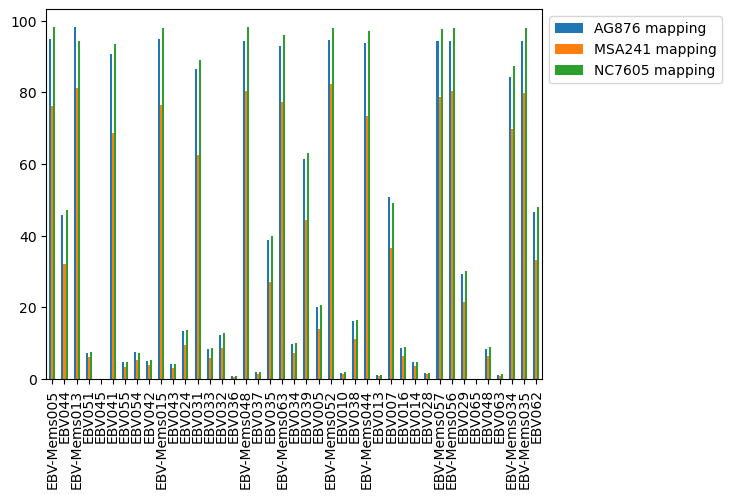

In [42]:
# Specify directories
dirs = ['/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836/v2/AG876_align',
       '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836/v2/MSA241_align',
       '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836/v2/NC7605_align']
genome = ['AG876', 'MSA241', 'NC7605']

# Make empty list for dataframes to go in 
mappingList = list()

# For loop to go through all directories load as pandas dataframe and put into list
for i in range(len(dirs)):
    files = dirs[i] + '/*.tsv'

    # Find input files
    inFiles = glob.glob(files)
    #print(inFiles)

    # Create sample names from file names
    inFileShort = [s.replace(dirs[i] + '/', '') for s in inFiles]
    samples = [s.replace('.tsv', '') for s in inFileShort]
    #print(samples)

    # Read in files 
    DF_list = [pd.read_csv(sheet, sep = '\t', names = ['QC-Passed-Reads',
                                                    'QC-Failed-Reads',
                                                    'Metric'], index_col = 2) for sheet in inFiles]

    # Create an array of mapping percentages
    # Empty dataframe for results to go in
    mapping = pd.DataFrame()
    for j in range(len(DF_list)):
        val = DF_list[j].loc['mapped %', 'QC-Passed-Reads']
        val2 = float(val.replace('%', ''))
        mapping[samples[j]] = [val2]
        mapping.index = [str(genome[i] + ' mapping')]
    
    mappingList.append(mapping)

# Transpose all the tables and make change colnames
for i in range(len(genome)):
    mappingList[i] = mappingList[i].transpose()

# Check mappingList
# print(mappingList)
# print(len(mappingList))
# list(mappingList['AG876'].columns)

# Merge dataframes together
mappingTotalDF = mappingList[0].join(mappingList[1:])
# print(totalDF)

# Plot
mappingTotalDF.plot.bar().legend(bbox_to_anchor=(1.0, 1.0))


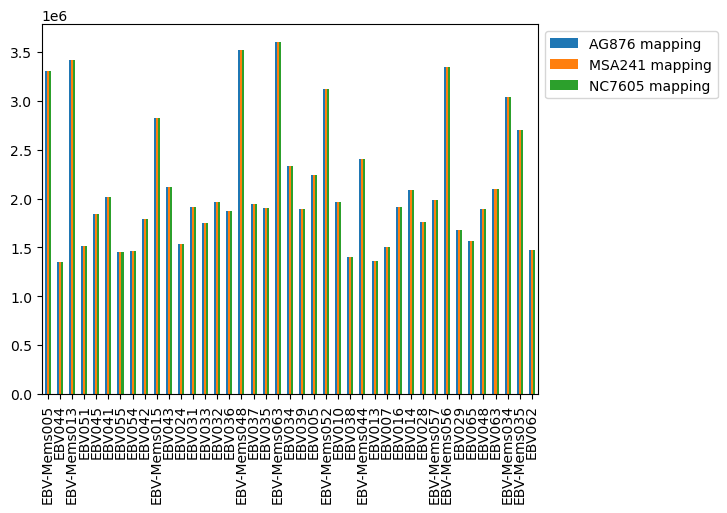

In [44]:
# Make a plot of total numbner of reads for each sample
# Make empty list for dataframes to go in 
nReadsList = list()

# For loop to go through all directories load as pandas dataframe and put into list
for i in range(len(dirs)):
    nReads = pd.DataFrame()
    for j in range(len(DF_list)):
        val = DF_list[j].loc['paired in sequencing', 'QC-Passed-Reads']
        val2 = float(val.replace('%', ''))
        nReads[samples[j]] = [val2]
        nReads.index = [str(genome[i] + ' mapping')]
    nReadsList.append(nReads)

# print(nReadsList)

# Transpose all the tables and make change colnames
for i in range(len(genome)):
    nReadsList[i] = nReadsList[i].transpose()

# Merge dataframes together
readsTotalDF = nReadsList[0].join(nReadsList[1:])
# print(totalDF)

# Plot
readsTotalDF.plot.bar().legend(bbox_to_anchor=(1.0, 1.0))


<Axes: xlabel='log_ViralLoad', ylabel='Average Mapping'>

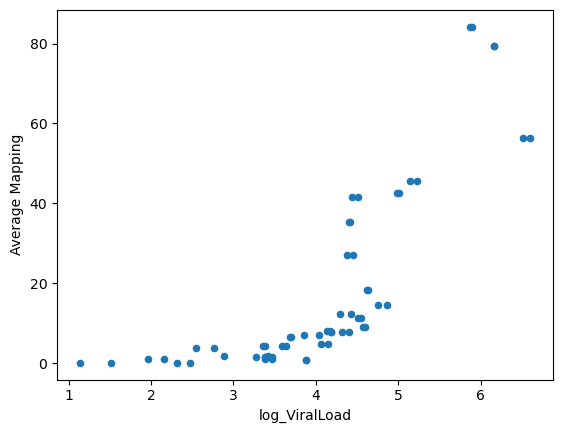

In [55]:
# Corrlate viral loads with mapping 

# Load viral load data
dir = '/Users/jamesboot/Documents/9.Genome Centre Files/GC-AAA-10836'
viralLoad = pd.read_csv(dir+'/viral_loads.csv', header=None)
viralLoad.rename(columns={0:'Sample', 1:'ViralLoad'}, inplace=True)
viralLoad.drop_duplicates(inplace=True)
viralLoad.duplicated()
viralLoad.index = viralLoad['Sample']
# print(viralLoad)

# Merge dataframes
mergeDF = viralLoad.merge(mappingTotalDF, left_index = True, right_index = True)
# print(mergeDF)

# Log transform viral load
mergeDF['log_ViralLoad'] = np.log10(mergeDF['ViralLoad'])

# Create an average mapping column
mergeDF['Average Mapping'] = mergeDF[['AG876 mapping', 'MSA241 mapping', 'NC7605 mapping']].mean(axis=1)

# Plot
mergeDF.plot.scatter(x = 'log_ViralLoad',
                     y = 'Average Mapping')